<h3>(1) Data Description</h3>

Data from unique players and details from their play sessions were collected from a minecraft server. The data consists of two files:<br>
__players.csv__ contains 196 observations and 7 variables<br>
| Variable | Type | Meaning |
|----------|------|----------|
|experience| categorical|The skill level of each player|
|subscribe| binary |The subscription status of the players to the game-related newspaper|
|hashedEmail|character|A unique player ID assigned to each player|
|played_hours|numeric|The total number of hours played in the server|
|name|character|The name of each player|
|gender|categorical|The gender of each player|
|Age|numeric|The age of each player|

__Potential__ __Issues:__ 
1) The age of some players were not recorded resulting in a missing value (N/A) <br>
2) Most have players had very little play time with a few outliers having over 200 hours

__sessions.csv__ contains 1535 observations and 5 variables<br>

| Variable | Type | Meaning |
|----------|------|----------|
|hashedEmail| character|A unique player ID assigned to each player|
|start_time| string |The day-month-year and the 24 hour time in which the player started the session|
|end_time|string|The day-month-year and the 24 hour time in which the player ended the session|
|original_start_time|numeric|The original number used to calculate the start time|
|original_end_time|numeric|The original number used to calculate the end time|

__Potential__ __Issues:__ 
1) The dataset is not tidy <br>
2) The __original_start_time__ and __original_end_time__ may need to be removed<br>
3) The __start_time__ and __end_time__ column may need to be wrangled and separated



<h3>(2) Questions</h3><br> 
__Broad__ __question:__ We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts<br> 
__Specific__ __question:__ Can we predict the play time using a players age, subscription status and experience?

<h3>(3) Exploratory Data Analysis and Visualization</h3>


In [35]:
#Loading Data Set into R
library(tidyverse)
players<-read_csv("https://raw.githubusercontent.com/andrewww166/planning_stage/main/players.csv")
sessions<-read_csv("https://raw.githubusercontent.com/andrewww166/planning_stage/main/sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [32]:
#Computing Mean Values for Quantitative Variables
mean_players<-players|>
summarize(mean_played_hours=mean(played_hours), mean_age=mean(Age, na.rm=TRUE))
mean_players

mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,21.13918


mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,21.13918


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


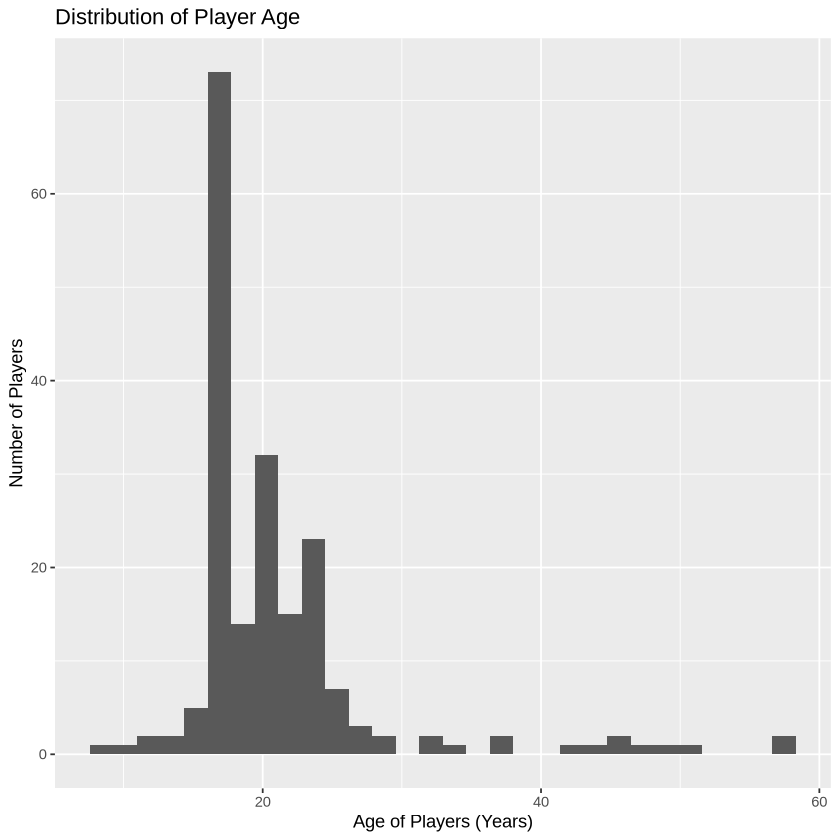

In [33]:
age_plot<-players|>
ggplot(aes(x=Age))+
geom_histogram()+
labs(x="Age of Players (Years)", y= "Number of Players", title="Distribution of Player Age")
age_plot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


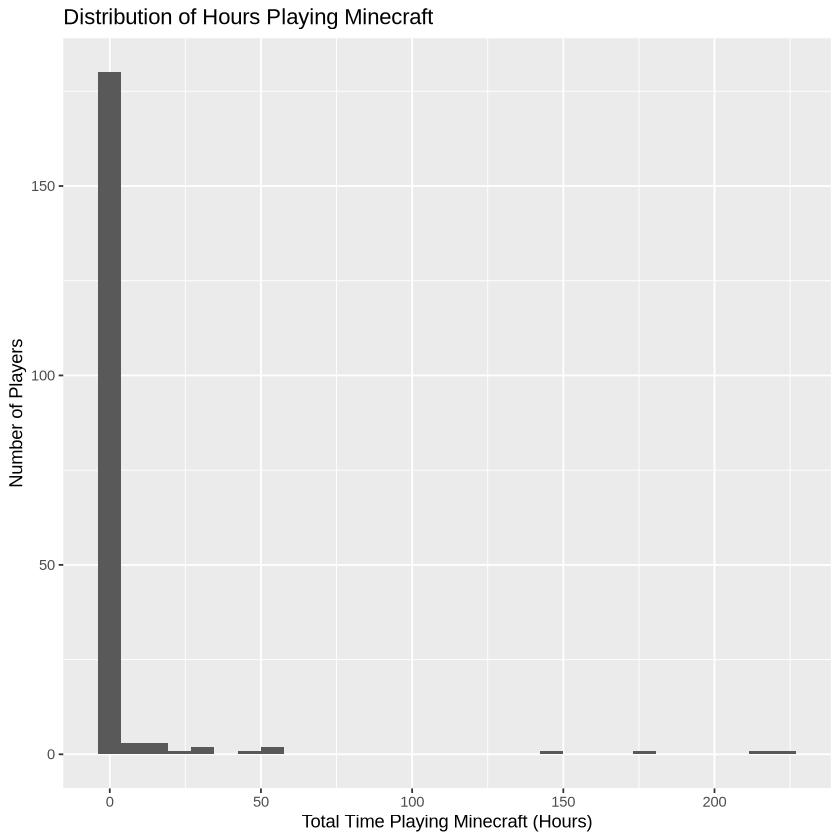

In [34]:
hours_plot<-players|>
ggplot(aes(x=played_hours))+
geom_histogram()+
labs(x="Total Time Playing Minecraft (Hours)", y="Number of Players", title="Distribution of Hours Playing Minecraft")
hours_plot

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


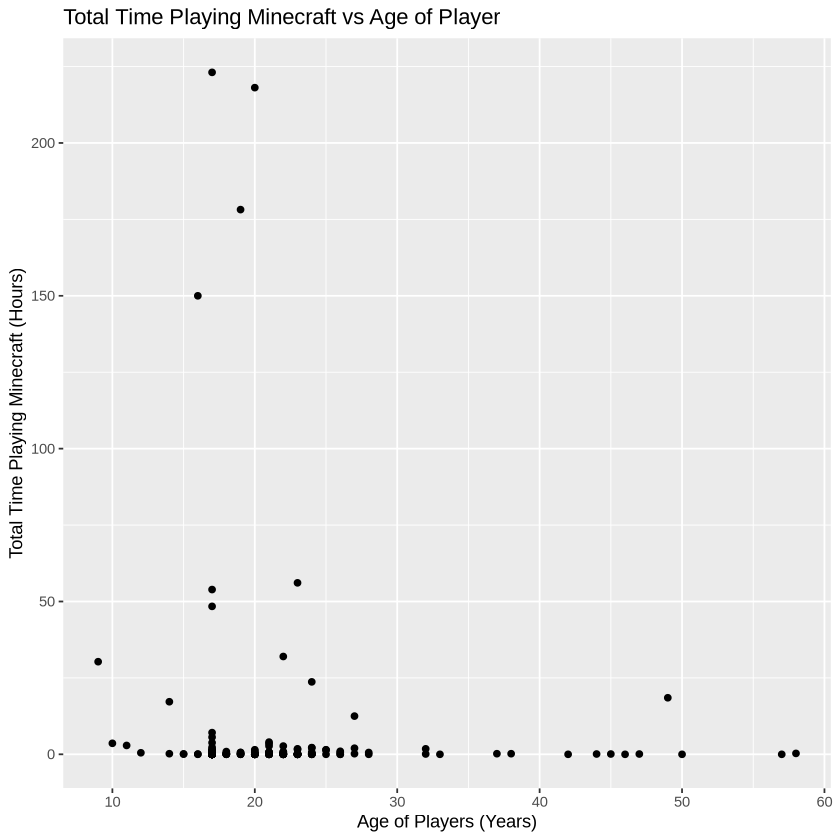

In [79]:
age_time_plot<-players|>
ggplot(aes(x=Age, y=played_hours))+
geom_point()+
labs(x="Age of Players (Years)", y="Total Time Playing Minecraft (Hours)", title="Total Time Playing Minecraft vs Age of Player")
age_time_plot